## Assignment 1

Consider the following CSV file "Concrete_Data.csv" containing the results of compressive tests for various types of concrete.

**1. Loading the CSV data into a pandas data frame. Print some high-level statistical info about the data frame's columns.**

In [15]:
#import libraries 

import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np
import matplotlib as mp

In [16]:

#Loading the data from .csv file
df_mfg = pd.read_csv("Concrete_Data.csv")

#Displaying top rows of the table
df_mfg.head()

#Printing high level statsitics of the data
df_mfg.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**2. Rows having compressive strength > 40 MPa

In [24]:
#Filtering the data with compressive strength >40 Mpa
df_mfg_cs40 = df_mfg[df_mfg["Concrete_Compressive_Strength"]>40]


            
#Counting the values in the newly created dataset( two alternatives)
df_mfg_cs40["Concrete_Compressive_Strength"].value_counts().sum()
df_mfg_cs40["Concrete_Compressive_Strength"].count()

379

**3. Histogram of Coarse Aggregate and Fine Aggregate values**

array([[<AxesSubplot:title={'center':'Fine_Aggregate'}>]], dtype=object)

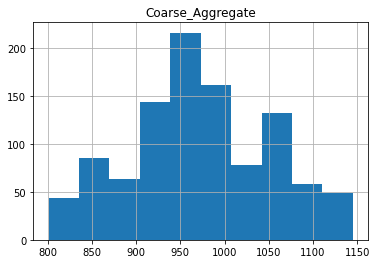

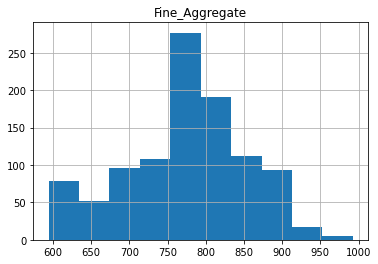

In [18]:
#Provision for getting graphs to display inline with the rest of your notebook,
# not in a separate window
%matplotlib inline

#Plotting histogram of Coarse Aggregate
df_mfg.hist("Coarse_Aggregate")

#Plotting histogram of Fine Aggregate
df_mfg.hist("Fine_Aggregate")

**4. Plot comparing compressive strength to age

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Concrete_Compressive_Strength'>

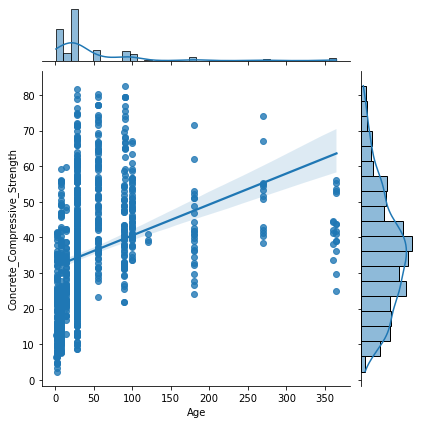

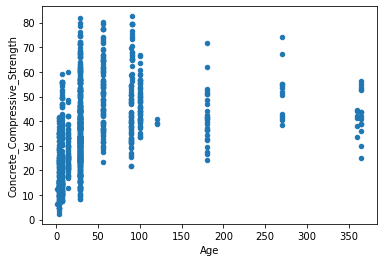

In [19]:
#Using seaborn to copmare compressive strength to age 
sns.jointplot("Age","Concrete_Compressive_Strength",df_mfg, kind = "reg")

#Using plot to study the relationship between compressive strength and age
df_mfg.plot(x ="Age", y ="Concrete_Compressive_Strength",kind = "scatter")

**5. Plot comparing compressive strength to age for only those rows with < 750 fine aggregate.**

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Concrete_Compressive_Strength'>

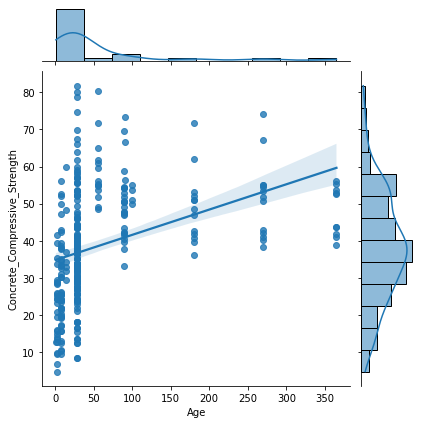

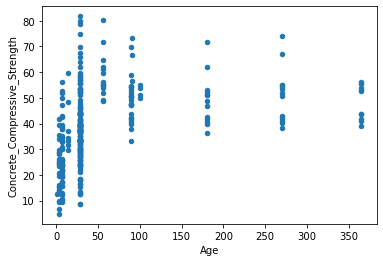

In [20]:
#Creating a dataset with data having fine agggregate < 750
df_mfg_fa750 = df_mfg[df_mfg["Fine_Aggregate"] < 750]

#Using seaborn to copmare compressive strength to age 
sns.jointplot("Age","Concrete_Compressive_Strength",df_mfg_fa750, kind = "reg")

#Using plot to study the relationship between compressive strength and age
df_mfg_fa750.plot(x ="Age", y ="Concrete_Compressive_Strength",kind = "scatter")

**6. Linear model that predicts compressive strength given the other available fields.**

In [21]:
#Importing linear model from sklearn
from sklearn import linear_model 

#Selection of linear regression model and its initialization as an object
my_model = linear_model.Lasso(alpha=0.01)

#Selection of feature variables and target variable
features = ["Cement","Blast_Furnace_Slag","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age"]
target = "Concrete_Compressive_Strength"

# Eliminate (drop) any instances with missing values (NaNs)
cleaned_df = df_mfg.dropna()

#Applying the linear model to the faetures and target
my_model.fit(cleaned_df[features],cleaned_df[target])

#Displaying the co-efficients of the model
pd.DataFrame(zip(features,my_model.coef_))


,0,1
0,Cement,0.119789
1,Blast_Furnace_Slag,0.103846
2,Fly_Ash,0.087924
3,Water,-0.150095
4,Superplasticizer,0.291550
5,Coarse_Aggregate,0.018048
6,Fine_Aggregate,0.020162
7,Age,0.114217


**7. Generating predictions for all the observations and a scatterplot comparing the predicted compressive strengths to the actual values.**

<AxesSubplot:xlabel='Concrete_Compressive_Strength', ylabel='predictions'>

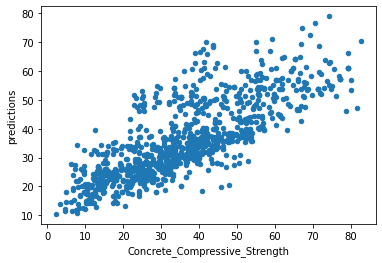

In [22]:
# Predicting from the model

#Predicting using features in trained model
predict = my_model.predict(cleaned_df[features])

#Adding the new column to original dataset
df_pred = cleaned_df.assign(predictions=predict)

#Displaying the top few row having columns of the predicted and original values 
df_pred[["Concrete_Compressive_Strength", "predictions"]].head(5)

#Creating a scatter splot comparing the original and predicted values
df_pred.plot(x= "Concrete_Compressive_Strength", y = "predictions", kind = "scatter")